<a href="https://colab.research.google.com/github/HenriqueHideaki/RepositorioInteligenciaArtificial/blob/main/Unidade%202/QUEST%C3%83O_01B_UNIDADE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from numpy.linalg import norm
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
import tensorflow as tf


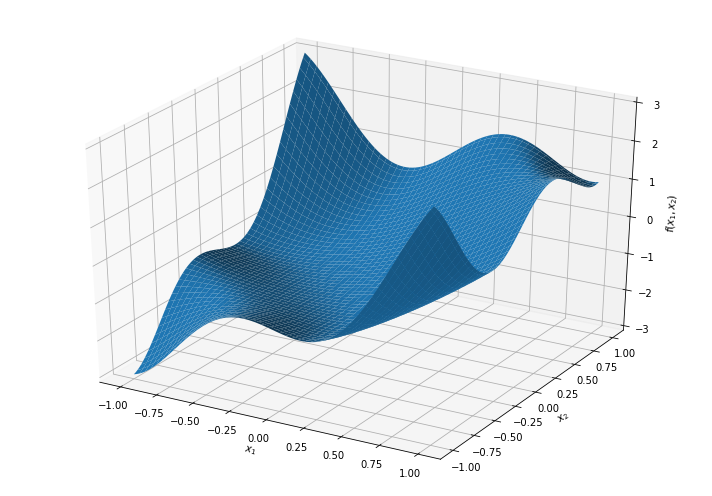

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

x1, x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)) # |x1| <= 1 -> -1 <= x1 <= 1 -> o mesmo para x2, com 100x100 superficies
z = x1*x1 +x2*x2 + 2*x1*x2*np.cos(np.pi*x1*x2) + x1 + x2 - 1

ax.plot_surface(x1, x2, z)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.tight_layout()
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    z.flatten(), 
    test_size=0.2, 
    random_state=505
)

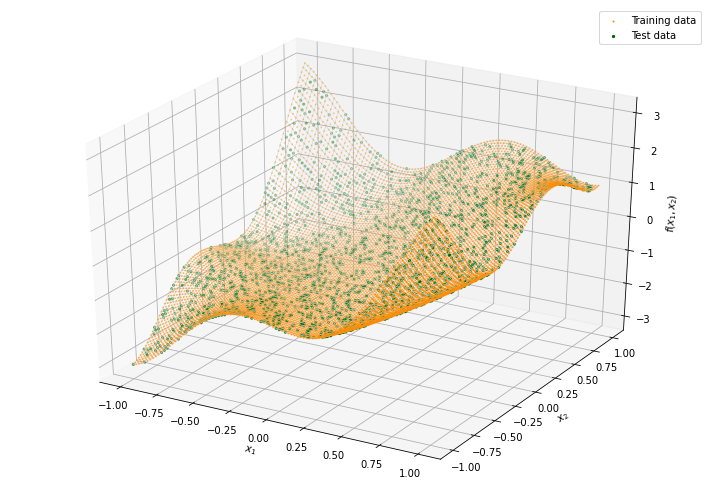

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_train[:,0], x_train[:,1], y_train, s=1, color='darkorange', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=5, color='darkgreen', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-traina

In [ ]:
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=600,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/600
900/900 [==============================] - 2s 2ms/step - loss: 0.1407 - val_loss: 0.0374 - lr: 0.0010
Epoch 2/600
900/900 [==============================] - 2s 2ms/step - loss: 0.0223 - val_loss: 0.0133 - lr: 0.0010
Epoch 3/600
900/900 [==============================] - 2s 2ms/step - loss: 0.0077 - val_loss: 0.0057 - lr: 0.0010
Epoch 4/600
900/900 [==============================] - 2s 2ms/step - loss: 0.0070 - val_loss: 0.0044 - lr: 0.0010
Epoch 5/600
900/900 [==============================] - 2s 2ms/step - loss: 0.0034 - val_loss: 0.0014 - lr: 0.0010
Epoch 6/600
900/900 [==============================] - 2s 2ms/step - loss: 0.0033 - val_loss: 0.0039 - lr: 0.0010
Epoch 7/600
900/900 [==============================] - 2s 2ms/step - loss: 0.0033 - val_loss: 0.0022 - lr: 0.0010
Epoch 8/600
900/900 [==============================] - 2s 2ms/step - loss: 0.0026 - val_loss: 6.4203e-04 - lr: 0.0010
Epoch 9/600
900/900 [==============================] - 2s 2ms/step - loss: 0.0040 - 

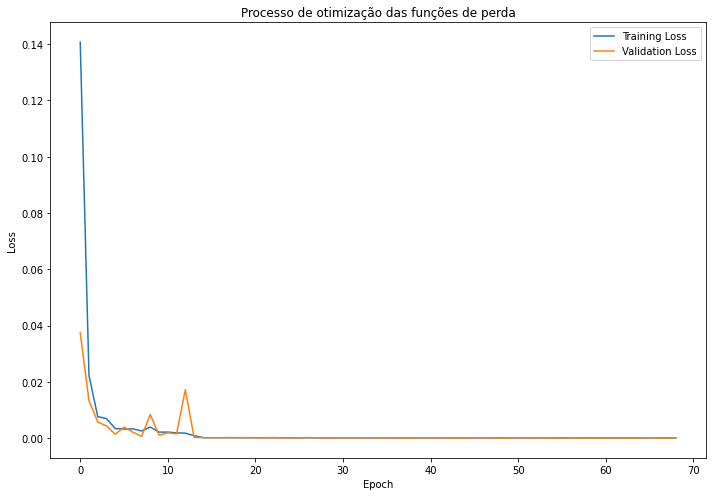

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

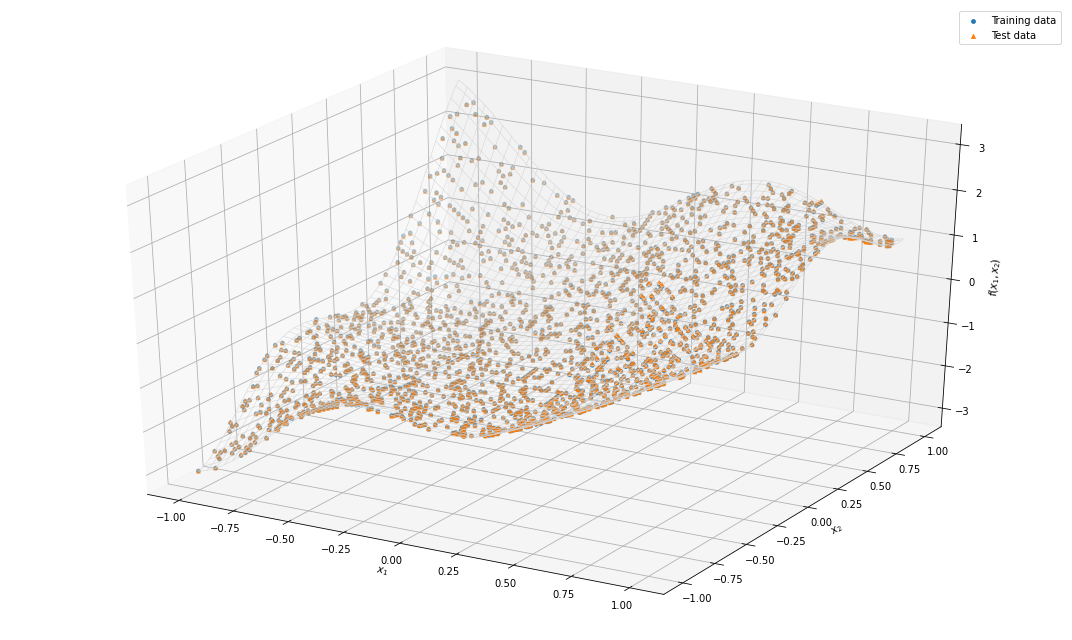

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=14, color='C0', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], mlp.predict(x_test), s=15, marker='^', color='C1', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()
